In [336]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [337]:
np.random.seed(42)

In [338]:
k = 10

In [339]:
# actual_mean = np.array([0.5, -0.8, 1.8, 1, 1.5, -1.4, -0.2, -1, 0.8, -0.3])
actual_mean = np.random.uniform(-1,1, k)
optimal_arm = np.argmax(actual_mean)
actual_mean

array([-0.25091976,  0.90142861,  0.46398788,  0.19731697, -0.68796272,
       -0.68801096, -0.88383278,  0.73235229,  0.20223002,  0.41614516])

In [340]:
def draw(k):
    return np.random.normal(actual_mean[k], 3)
draw(2)

-0.9444352741820461

In [347]:
initial_value = [None for _ in range(len(actual_mean))]

for arm in range(k):
    initial_value[arm] = np.array([draw(arm) for _ in range(1)]).mean()
    
# estimated_value = np.array([0] * k)

In [351]:
len(run(T = 1000, initial_value = initial_value, strategy = 'greedy')) , len(run(T = 1000, initial_value = initial_value))

(1000, 1000)

In [359]:
def k_arms_testbed(T = 1000, epsilon = 0.1, initial_value = [0] * k, strategy = 'epsilon-greedy'):

    arms_pulled_frequency = dict(zip(range(10), [1]*k))
    estimated_value = initial_value

    total_reward_collected = 0
    avg_reward = []

    for t in range(1, T+1):
        
        choice = choice = np.random.choice(['Explore', 'Exploit'], p = [epsilon, 1-epsilon]) #epsilon-greedy by default
        if strategy == 'greedy':
            choice = 'Exploit'

        if choice == 'Exploit':
            arm_selected = np.argmax(estimated_value)    
        elif choice == 'Explore':
            arm_selected = np.random.choice(range(0, k))

        arms_pulled_frequency[arm_selected] += 1

        step_size = 1 / arms_pulled_frequency[arm_selected] # Sample average method for action value estimation (i.e. Q (a)) 
        # step_size = 0.5 # Constant step size for exponential recency-weighted average, used for non-stationaery cases

        payout = draw(arm_selected)
        total_reward_collected += payout
        avg_reward.append(total_reward_collected / t)

        #update value estimation based on payout
        estimated_value[arm_selected] = estimated_value[arm_selected] + step_size * (payout - estimated_value[arm_selected])

    return avg_reward

In [370]:
a = [1, 2, 3]
b = [3, 2, 1]
c = [10, 2, -3]
d = [1, 8, 7]

cache = np.array([a]) + np.array([b])
cache = cache + np.array(c)
cache = cache + np.array(d)
cache / 4

array([[3.75, 3.5 , 2.  ]])

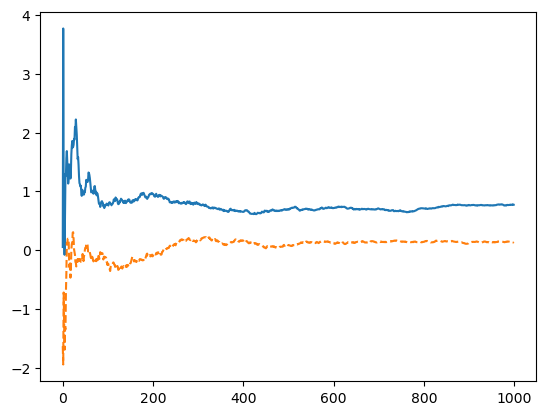

In [360]:
T = 1000
plt.plot(range(T), k_arms_testbed(T, initial_value = initial_value, strategy = 'epsilon-greedy'))
plt.plot(range(T), k_arms_testbed(T, initial_value = initial_value, strategy = 'greedy'), '--')
plt.show()